<a href="https://colab.research.google.com/github/mandar-gite/Jupyter-algorithm/blob/master/Assignment_121_yeast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<center>
    <img src="https://www.bits-pilani.ac.in/Uploads/Campus/BITS_university_logo.gif" alt="Institute Logo">
</center>

<center><h1><b>Work Integrated Learning Programmes Division M.Tech(AIML)</b></h1></center>
<center><h2><b>Machine Learning</b></h2></center>
<center><h3><b>S2-22_AIMLCZG565</b></h3></center>
<center><h4><b>Assignment 1 – PS-3</b></h4></center>

 ## Group No 121

### **Group Members:**

- Roshni Ghosh
- Avishek Ghosh
- Mandar Gite

### **DATASET: YEAST**


<h3>SECTION 1: Import Libararies / Dataset</h3>

### <font style="color: teal;"><h3>Import Liabraries</h3></font>


In [78]:
!pip install squarify
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from wordcloud import WordCloud

### <font><h3> Downlaod Dataset</h3></font>

In [79]:
import gdown

# Define the URL of the CSV file in  Google Drive
url = 'https://drive.google.com/uc?id=13e--QYXVbTUed650YYF3mRKnnivdUakE'

# Download the file using gdown
gdown.download(url, 'data.csv')


#'https://drive.google.com/file/d/13e--QYXVbTUed650YYF3mRKnnivdUakE/view?usp=sharing'

Downloading...
From: https://drive.google.com/uc?id=13e--QYXVbTUed650YYF3mRKnnivdUakE
To: /content/data.csv
100%|██████████| 60.1k/60.1k [00:00<00:00, 43.3MB/s]


'data.csv'

### <font style="color: teal;"><h3>Import DataSet</h3></font>

In [80]:
# Importing the dataset
df = pd.read_csv("data.csv")

### <h3>Data Visualization and Exploration</h3>

In [81]:
df.head(2)

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT


In [82]:
df.columns


Index(['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc', 'name'], dtype='object')

In [83]:
df.describe

<bound method NDFrame.describe of        mcg   gvh   alm   mit  erl  pox   vac   nuc name
0     0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22  MIT
1     0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22  MIT
2     0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22  MIT
3     0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22  NUC
4     0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22  MIT
...    ...   ...   ...   ...  ...  ...   ...   ...  ...
1479  0.81  0.62  0.43  0.17  0.5  0.0  0.53  0.22  ME2
1480  0.47  0.43  0.61  0.40  0.5  0.0  0.48  0.47  NUC
1481  0.67  0.57  0.36  0.19  0.5  0.0  0.56  0.22  ME2
1482  0.43  0.40  0.60  0.16  0.5  0.0  0.53  0.39  NUC
1483  0.65  0.54  0.54  0.13  0.5  0.0  0.53  0.22  CYT

[1484 rows x 9 columns]>

In [84]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)


Missing values per column:
mcg     0
gvh     0
alm     0
mit     0
erl     0
pox     0
vac     0
nuc     0
name    0
dtype: int64


In [85]:
# Check for Not available / #NA values
NA_values = df.isna().sum()
print("Not Available values per column:")
print(NA_values)

Not Available values per column:
mcg     0
gvh     0
alm     0
mit     0
erl     0
pox     0
vac     0
nuc     0
name    0
dtype: int64


In [86]:
# check for duplicate values
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)



Number of duplicate rows: 31


In [87]:
# Create a boolean mask to identify duplicate rows
duplicate_mask = df.duplicated()

# Select the duplicate rows
duplicate_rows = df[duplicate_mask]

# Select the unique rows
unique_rows = df[~duplicate_mask]

# Print the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)




Duplicate Rows:
       mcg   gvh   alm   mit  erl  pox   vac   nuc name
161   0.40  0.42  0.71  0.21  0.5  0.0  0.54  0.32  CYT
237   0.38  0.51  0.75  0.17  0.5  0.0  0.55  0.22  CYT
407   0.37  0.34  0.58  0.24  0.5  0.0  0.44  0.18  NUC
409   0.39  0.39  0.55  0.52  0.5  0.0  0.37  0.16  NUC
419   0.51  0.48  0.58  0.22  0.5  0.0  0.50  0.28  NUC
436   0.44  0.53  0.52  0.37  0.5  0.0  0.50  0.22  NUC
448   0.45  0.57  0.30  0.17  0.5  0.0  0.51  0.22  ME3
932   0.45  0.50  0.57  0.29  0.5  0.0  0.44  0.11  CYT
934   0.61  0.38  0.57  0.36  0.5  0.0  0.44  0.21  CYT
936   0.43  0.33  0.54  0.37  0.5  0.0  0.38  0.16  CYT
963   0.46  0.35  0.69  0.18  0.5  0.0  0.30  0.25  CYT
965   0.57  0.43  0.52  0.30  0.5  0.0  0.37  0.11  CYT
967   0.59  0.51  0.48  0.12  0.5  0.0  0.54  0.31  CYT
970   0.61  0.48  0.56  0.19  0.5  0.0  0.53  0.31  CYT
975   0.72  0.37  0.63  0.38  0.5  0.0  0.40  0.14  CYT
979   0.63  0.64  0.45  0.26  0.5  0.0  0.43  0.22  CYT
985   0.40  0.45  0.61  0.29  0.

In [88]:
df = df.drop_duplicates()


In [89]:
df.describe

<bound method NDFrame.describe of        mcg   gvh   alm   mit  erl  pox   vac   nuc name
0     0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22  MIT
1     0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22  MIT
2     0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22  MIT
3     0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22  NUC
4     0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22  MIT
...    ...   ...   ...   ...  ...  ...   ...   ...  ...
1479  0.81  0.62  0.43  0.17  0.5  0.0  0.53  0.22  ME2
1480  0.47  0.43  0.61  0.40  0.5  0.0  0.48  0.47  NUC
1481  0.67  0.57  0.36  0.19  0.5  0.0  0.56  0.22  ME2
1482  0.43  0.40  0.60  0.16  0.5  0.0  0.53  0.39  NUC
1483  0.65  0.54  0.54  0.13  0.5  0.0  0.53  0.22  CYT

[1453 rows x 9 columns]>

#### Observation:
All values are present in all columns. There are no missing or Not Available values

In [90]:
df.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [91]:
names = df["name"]
unique_names = names.unique()

print(f"There are {len(unique_names)} names as follows:","\n",unique_names)

There are 10 names as follows: 
 ['MIT' 'NUC' 'CYT' 'ME1' 'EXC' 'ME2' 'ME3' 'VAC' 'POX' 'ERL']


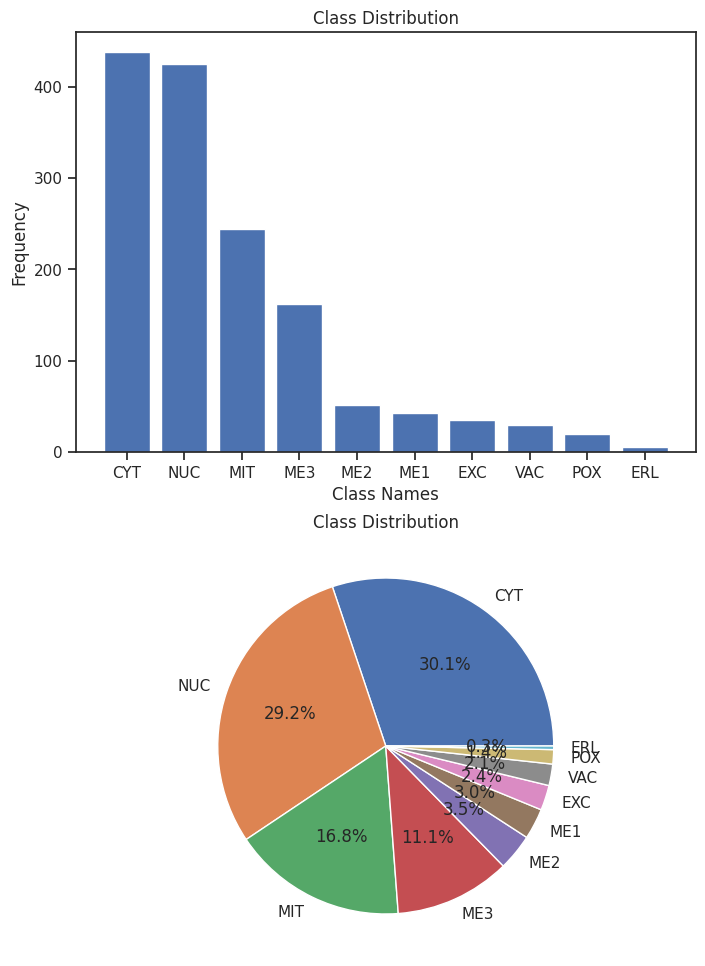

In [92]:
import matplotlib.pyplot as plt

# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 12))

# Plot the bar plot in the first subplot
ax1.bar(class_labels, class_frequencies)
ax1.set_xlabel('Class Names')
ax1.set_ylabel('Frequency')
ax1.set_title('Class Distribution')

# Plot the pie chart in the second subplot
ax2.pie(class_frequencies, labels=class_labels, autopct='%1.1f%%')
ax2.set_title('Class Distribution')

# Adjust spacing between the subplots
fig.subplots_adjust(hspace=0.2)

# Display the plot
plt.show()



<ipython-input-46-b2970415f3d6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


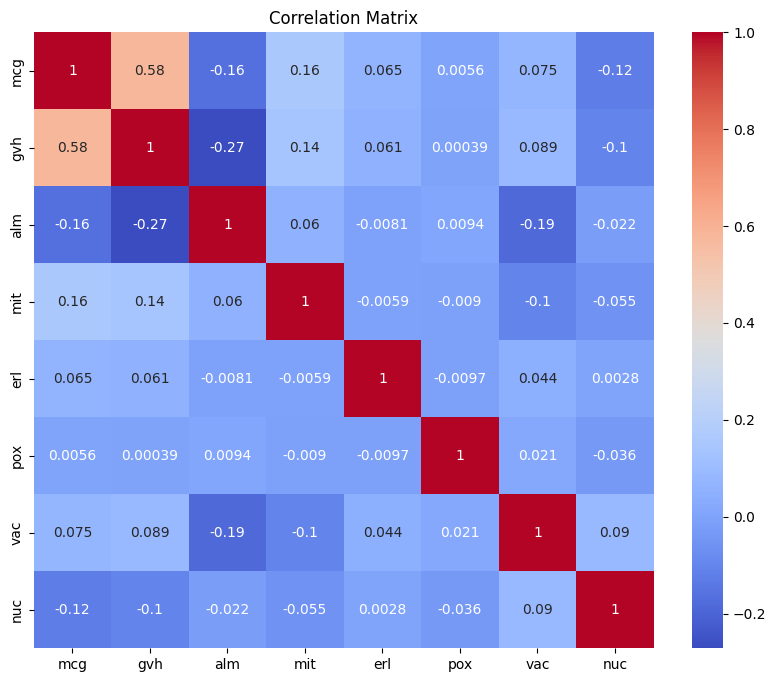

In [ ]:
 # Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [75]:
y = df["name"].value_counts().head(50).to_frame()
y.index
y.head()
y.describe


<bound method NDFrame.describe of      name
CYT   438
NUC   425
MIT   244
ME3   162
ME2    51
ME1    43
EXC    35
VAC    30
POX    20
ERL     5>

In [77]:
#@title
sns.set_theme(style="ticks")
sns.pairplot(df, hue="name")


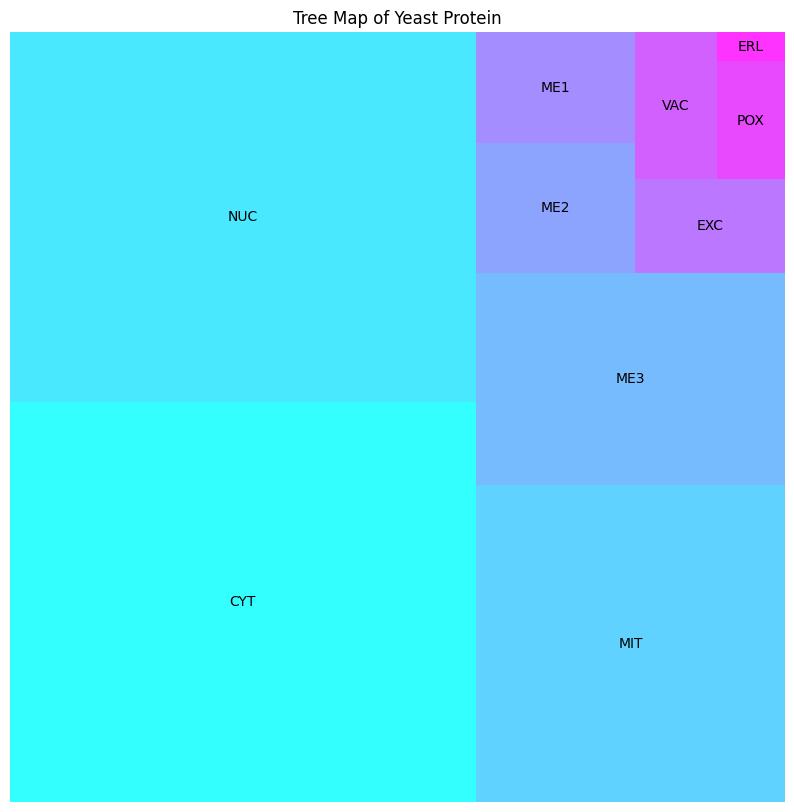

In [ ]:
# plotting a tree map

plt.rcParams['figure.figsize'] = (10, 10)
color = plt.cm.cool(np.linspace(0, 1,10))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map of Yeast Protein')
plt.axis('off')
plt.show()

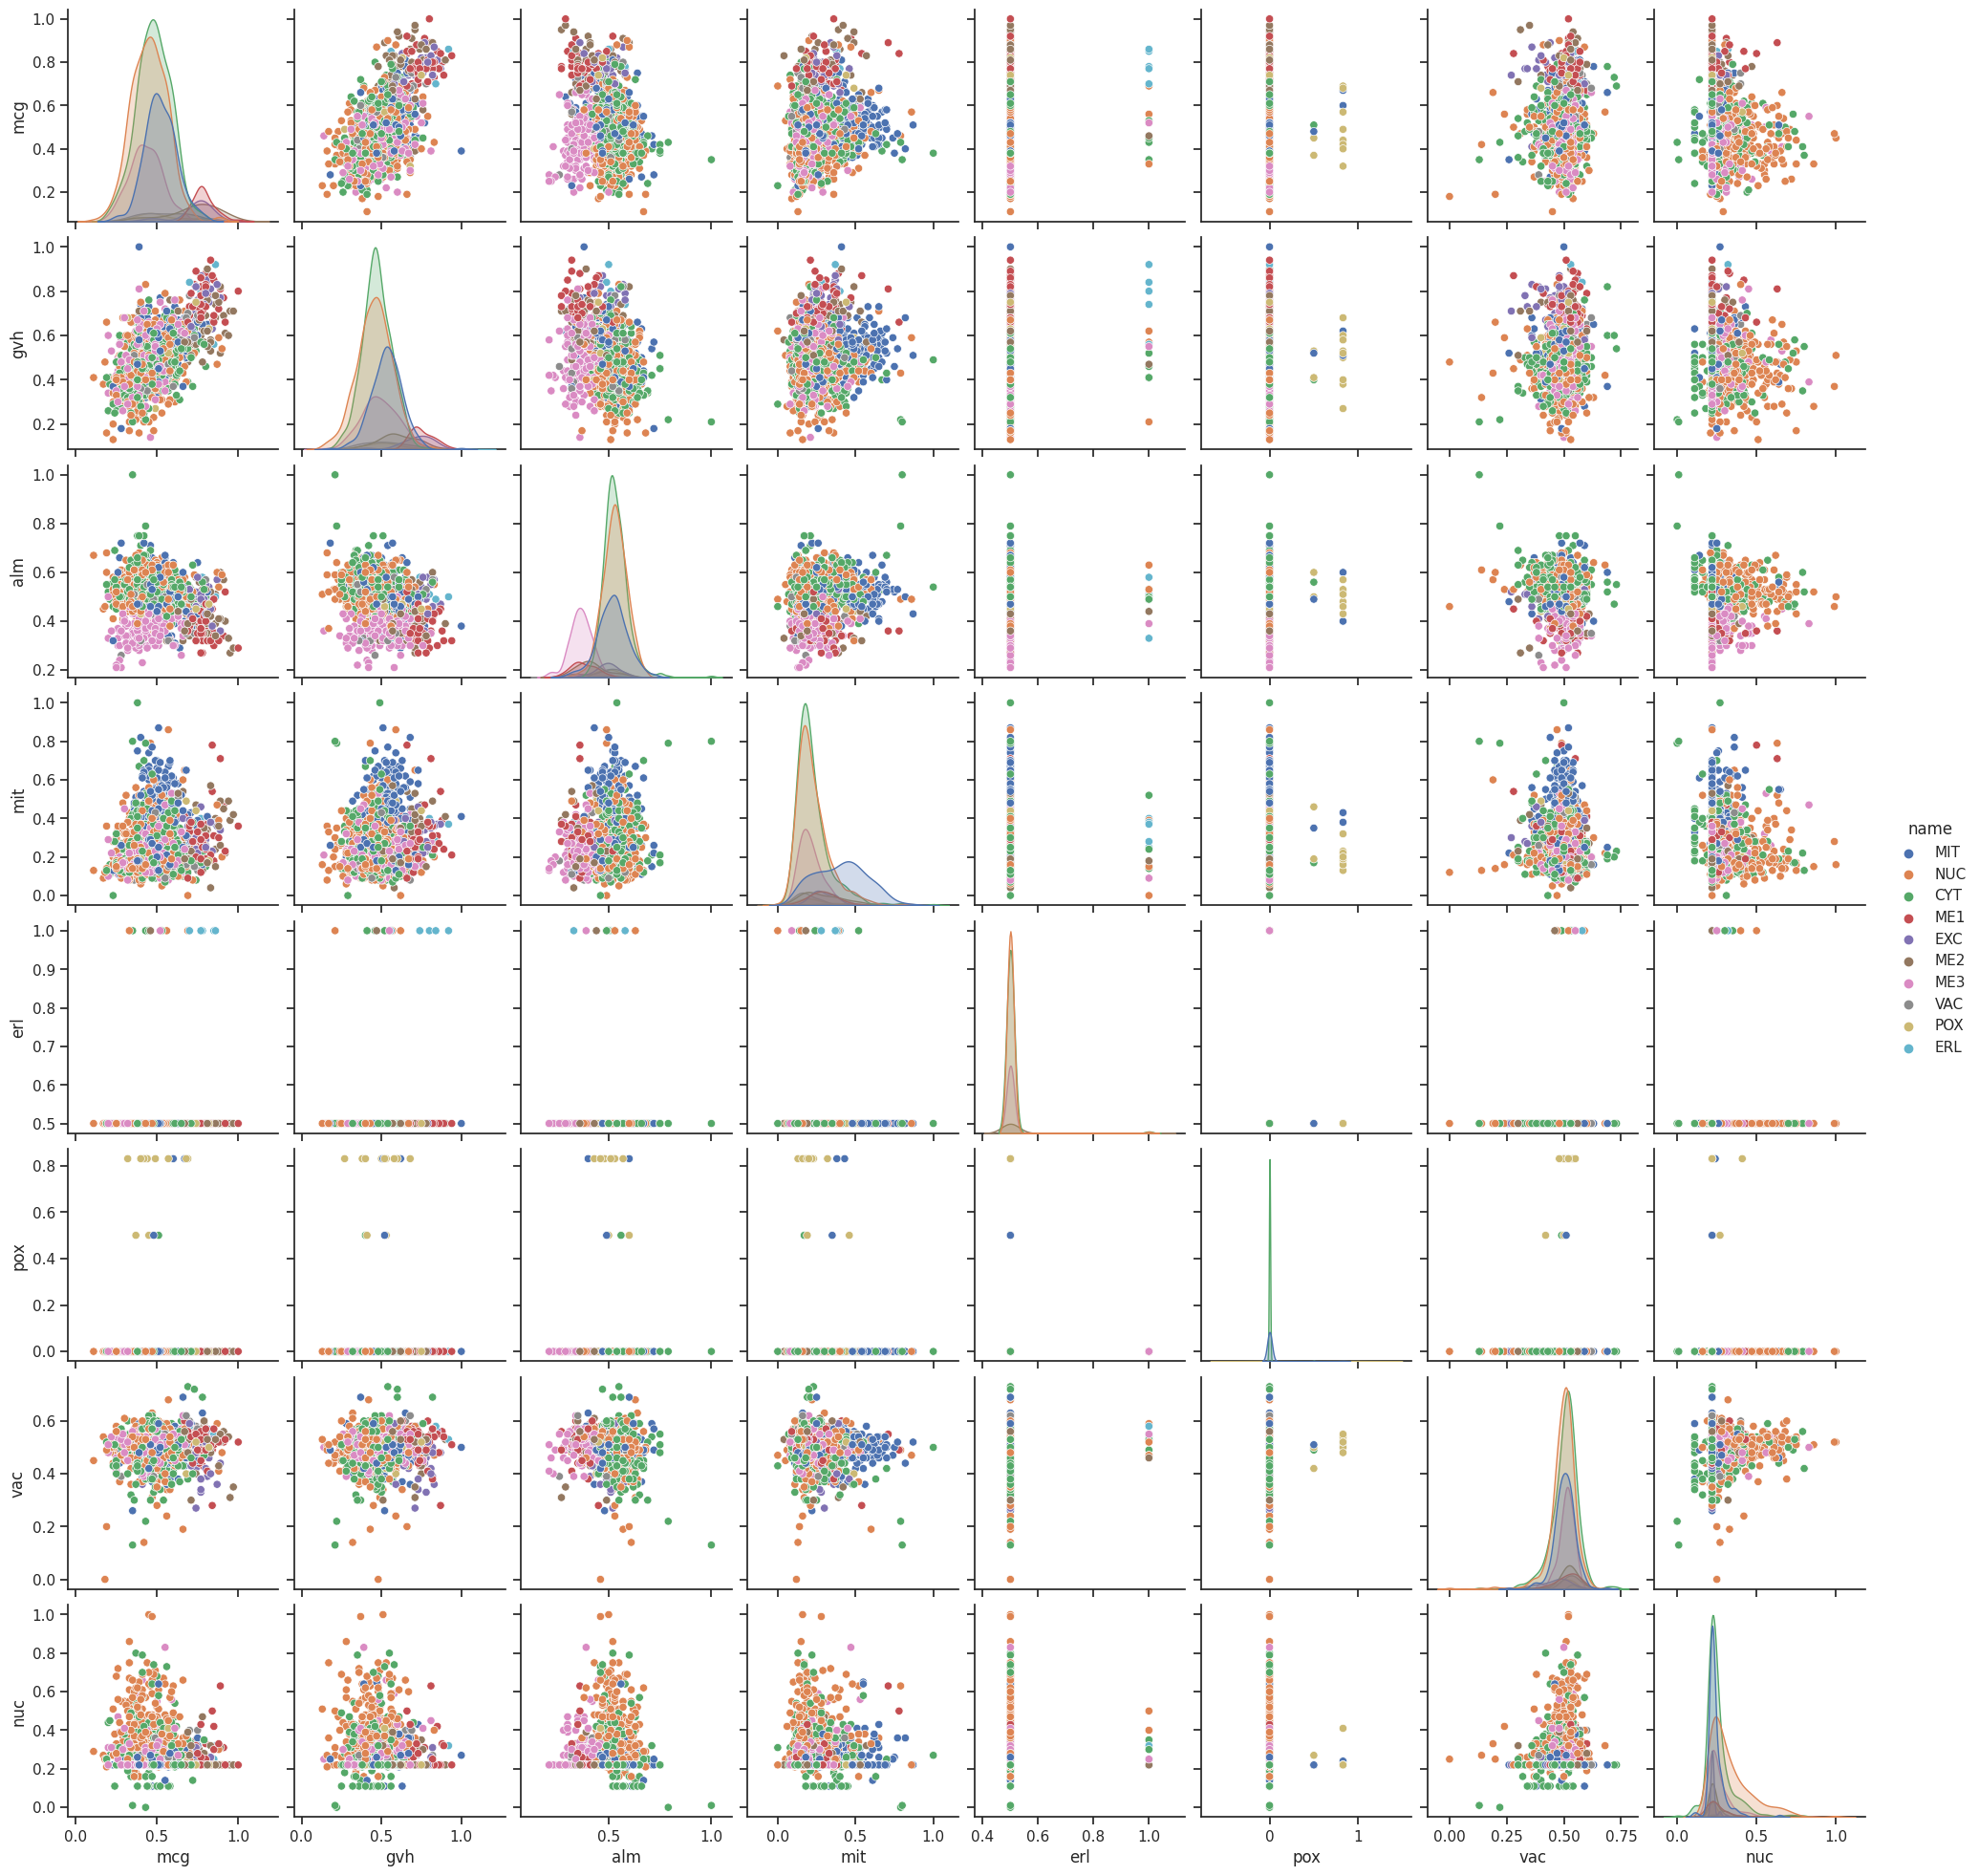

In [94]:
sns.set_theme(style="ticks")
sns.pairplot(df, hue="name")


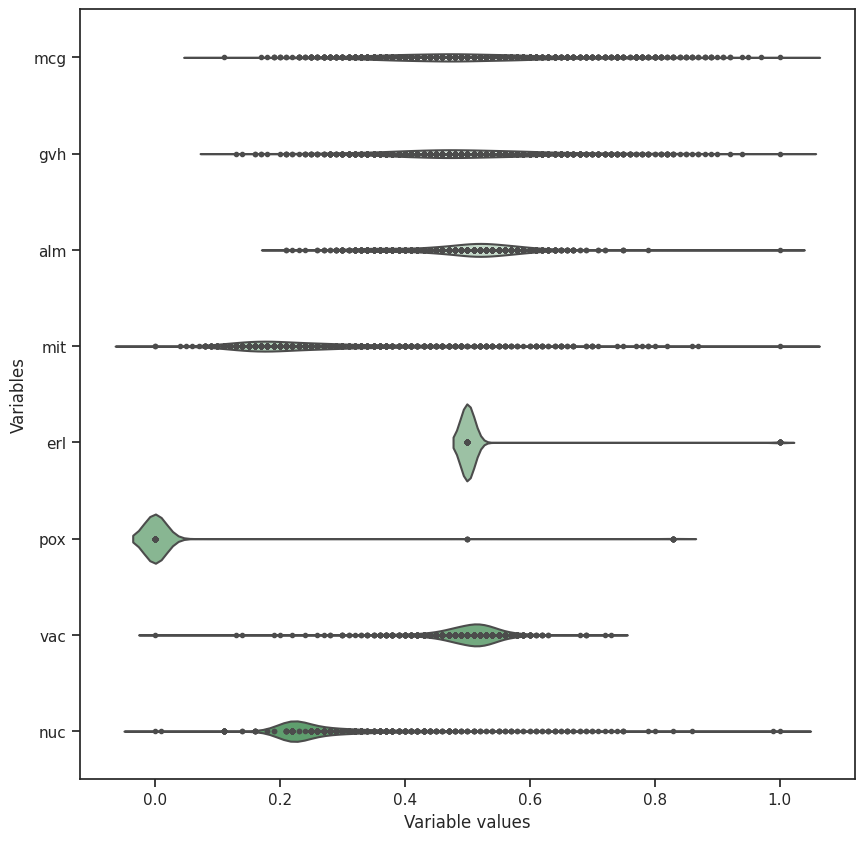

In [102]:
# Select the columns to plot
columns_to_plot =  ['mcg','gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc']

# Create the violin plot
sns.violinplot(data=df[columns_to_plot], palette="light:g", inner="points", orient="h")

# Set plot labels
plt.xlabel('Variable values')
plt.ylabel('Variables')

# Show the plot
plt.show()


In [66]:
df.shape
df.describe()
df.info()
df.nunique()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 0 to 1483
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     1453 non-null   float64
 1   gvh     1453 non-null   float64
 2   alm     1453 non-null   float64
 3   mit     1453 non-null   float64
 4   erl     1453 non-null   float64
 5   pox     1453 non-null   float64
 6   vac     1453 non-null   float64
 7   nuc     1453 non-null   float64
 8   name    1453 non-null   object 
dtypes: float64(8), object(1)
memory usage: 113.5+ KB


mcg     0
gvh     0
alm     0
mit     0
erl     0
pox     0
vac     0
nuc     0
name    0
dtype: int64

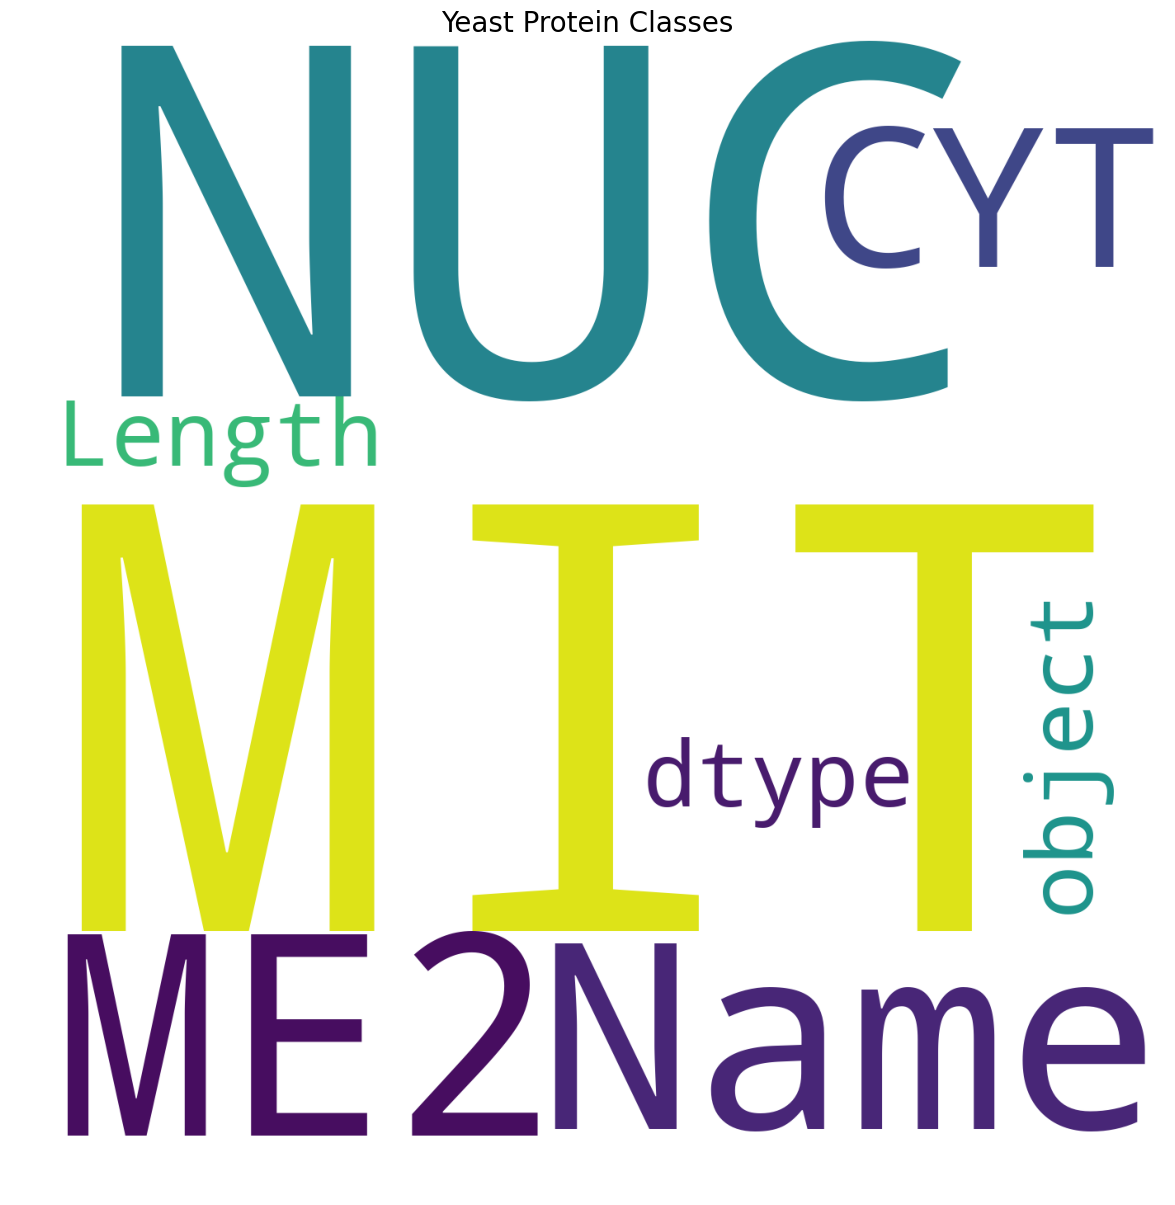

In [ ]:
plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1400,  height = 1400, max_words = 500).generate(str(df["name"]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Yeast Protein Classes',fontsize = 20)
plt.show()

In [67]:
df[df.duplicated(keep=False)]
df.drop_duplicates()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
...,...,...,...,...,...,...,...,...,...
1479,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
1480,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC
1481,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2
1482,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC


### <h3>Data Pre-processing and cleaning

### <h3>Model Building</h3>

### <h3>Performance Evaluation<h3>